# Demo For Palm Detection
### BlazePalm (mediapipe/modules/palm_detection/palm_detection.tflite)

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import torch
import torchvision as tv

from blaze.hand_detection import HandDetection
from detect_result import DetectResult

In [2]:
HandDetection.IMAGE_NORMALIZE = True

detector = HandDetection()
state = torch.load('model/palm_detection.pth', map_location='cpu')
detector.load_state_dict(state, strict=True)

<All keys matched successfully>

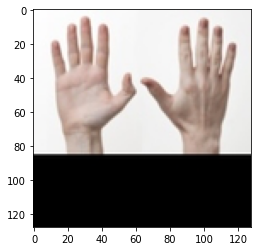

In [3]:
image = tv.io.image.read_image('data/2.jpg')
plt.imshow(image.numpy().transpose([1, 2, 0]))


In [4]:
scores, boxes = detector(image[None])

filter = DetectResult(HandDetection.NUM_CLASSES, HandDetection.NUM_COORDS, 0.5, 0.3)
scores, boxes = filter(scores, boxes)

scores = scores.cpu().detach().numpy()
boxes = boxes.cpu().detach().numpy() * 128
print(scores)
print(boxes)


[[0.95712304]
 [0.88208777]]
[[ 32.771442  52.194767  32.699448  32.69944   22.305885  67.66906
   40.34894   38.528122  31.464832  37.055363  23.462637  38.04798
   16.245573  40.861355  37.84231   63.178474  50.63421   53.99298 ]
 [101.19339   55.695885  34.424603  34.424603 106.67433   71.06453
   95.72795   44.453682 103.90013   43.13578  110.165085  43.549927
  114.89475   45.334473  92.73859   65.30466   83.54326   55.025707]]


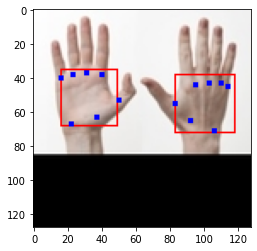

In [5]:
cv_img = cv.imread('data/2.jpg')
for box in boxes:
    box, points = box[:4].reshape([2, 2]), box[4:].reshape([-1, 2])
    lt = box[0] - box[1] / 2
    rb = box[0] + box[1] / 2
    cv_img = cv.rectangle(cv_img, lt.astype('int32'), rb.astype('int32'), color=(0, 0, 255), thickness=1)
    for pts in points:
        cv_img = cv.drawMarker(cv_img, pts.astype('int32'), (255, 0, 0), markerType=2, markerSize=3)
plt.figure()
plt.imshow(cv_img[..., ::-1])